
# Project: Investigate show up for medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset has information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

**‘ScheduledDay’** tells us on what day the patient set up their appointment. <br>**‘Neighborhood’** indicates the location of the hospital.
<br>**‘Scholarship’** indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

**Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Questions for Analysis
- does gender affect the show up?
- does age affect the show up?
- does having scholarship affect the show up?


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties


In [2]:
df = pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

**date set cosist of 14 columns and 110527 rows**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning

In [5]:
#check if data have duplicated values
df.duplicated().sum()

0

**data has no duplictes**

In [6]:
#check if data have duplicated Patient Id
df.duplicated(['PatientId']).sum()

48228

**we have 48228 duplicated Id**

In [7]:
df.duplicated(['PatientId', 'No-show']).sum()

38710

**we have 38710 id as show and no show at the same time so we need to remove it**

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**mean of ages is 37, max is 115 and min is -1 which isnt logical and needs to be deleted. around 50% of ages between 18 to 55
majority doesn't have chronic diaseases and not alcholic. only around 25% recived SMS. also majority aren't handcaped and doesn't have Scholarship.**

In [9]:
# finding the negative age then dropping it from data 
negative_age=df.query('Age==-1')
negative_age

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [10]:
df.drop(index=99832, inplace=True)

In [11]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
#renaming columns to fit properly
df.rename(columns={'Hipertension':'Hypertension'}, inplace = True)
df.rename(columns={'No-show':'No_show'}, inplace = True)

In [13]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
#removing unnecessary duplicates
df.drop_duplicates(['No_show','PatientId'], inplace=True)

In [15]:
#removing unnecessary columns
df.drop(['AppointmentID','PatientId','AppointmentDay','ScheduledDay'], axis=1, inplace=True)

In [16]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis


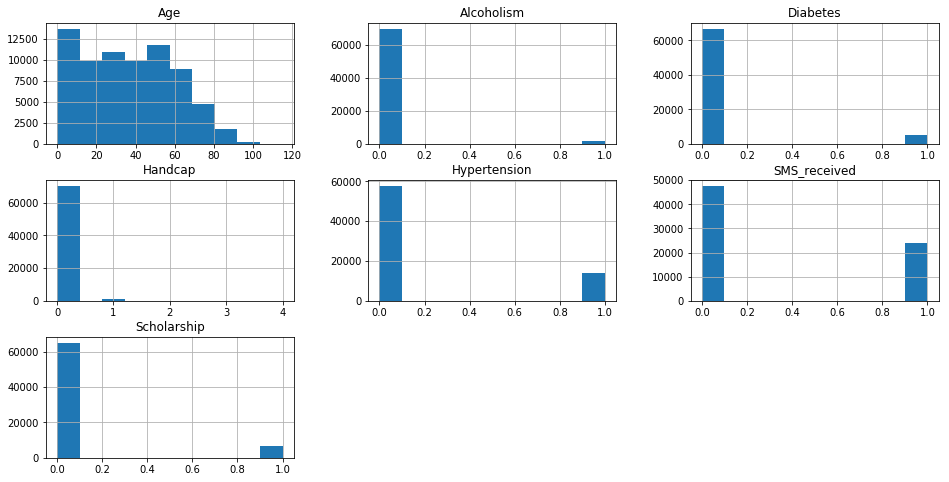

In [17]:
df.hist(figsize= (16,8));

In [18]:
show = df["No_show"] == 'No'
noshow = df["No_show"] == 'Yes'
df[show].count(), df[noshow].count()

(Gender           54153
 Age              54153
 Neighbourhood    54153
 Scholarship      54153
 Hypertension     54153
 Diabetes         54153
 Alcoholism       54153
 Handcap          54153
 SMS_received     54153
 No_show          54153
 dtype: int64, Gender           17663
 Age              17663
 Neighbourhood    17663
 Scholarship      17663
 Hypertension     17663
 Diabetes         17663
 Alcoholism       17663
 Handcap          17663
 SMS_received     17663
 No_show          17663
 dtype: int64)

In [19]:
df[show].mean(), df[noshow].mean()

(Age             37.229166
 Scholarship      0.091334
 Hypertension     0.202944
 Diabetes         0.072868
 Alcoholism       0.023600
 Handcap          0.020904
 SMS_received     0.297232
 dtype: float64, Age             34.376267
 Scholarship      0.108419
 Hypertension     0.170922
 Diabetes         0.065108
 Alcoholism       0.029440
 Handcap          0.017777
 SMS_received     0.453094
 dtype: float64)

**mean age for show is 37 while for no show is 34. SMS recived by the show patient are less than the no show so there is something wrong with SMS service and it need some attention and develpment.**

### Research Question 1 (Does age affect the show up?)

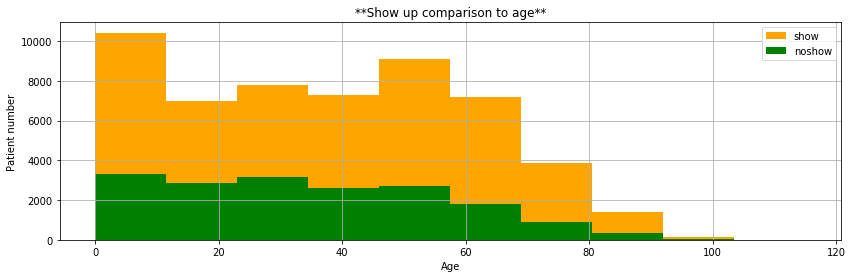

In [35]:
def age_to_showup():
    df['Age'][show].hist( bins=10, color='orange', figsize=[14,4], label='show');
    df['Age'][noshow].hist(bins=10, color='green', label='noshow', figsize=[14,4]);
    plt.legend();
    plt.title('**Show up comparison to age**');
    plt.xlabel('Age');
    plt.ylabel('Patient number');
age_to_showup()

**yonger patients aged 0:10 showed up so parents are taking care of their kids as usual. the other high show percentage were in ages 45:55 then the show percentage starts to go down with the age increace.**

### Research Question 2  (Does gender affect the show up?)

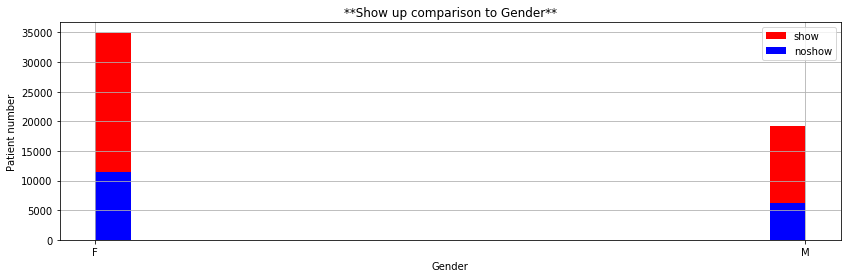

In [37]:
def gender_to_showup():
    df['Gender'][show].hist(bins=20, color='red', label='show', figsize=[14,4]);
    df['Gender'][noshow].hist(bins=20, color='blue', label='noshow',figsize=[14,4]);
    plt.legend();
    plt.title('**Show up comparison to Gender**');
    plt.xlabel('Gender');
    plt.ylabel('Patient number');
gender_to_showup()

**showing up for females is way higher than males with percentage nearly 2:1.**

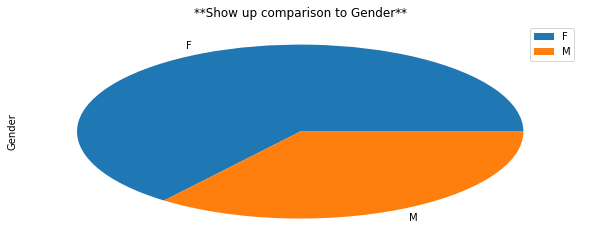

In [22]:
df['Gender'][show].value_counts(normalize=True).plot(kind='pie', figsize=[10,4]);
plt.legend();
plt.title('**Show up comparison to Gender**');

In [23]:
df['Gender'][show].value_counts(normalize=True)

F    0.645578
M    0.354422
Name: Gender, dtype: float64

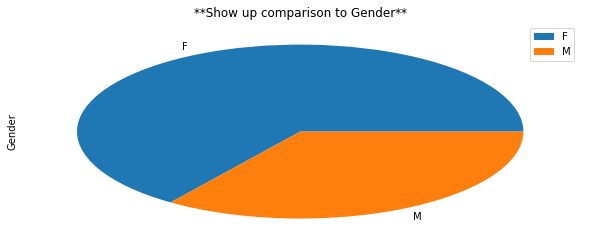

In [24]:
df['Gender'][noshow].value_counts(normalize=True).plot(kind='pie', figsize=[10,4]);
plt.legend();
plt.title('**Show up comparison to Gender**');

In [25]:
df['Gender'][noshow].value_counts(normalize=True)

F    0.651418
M    0.348582
Name: Gender, dtype: float64

**based on gender we find that in both cases showing or no showing the females had the higher percentage.**

### Research Question 3  (Does having Scholarship affect the show up?)

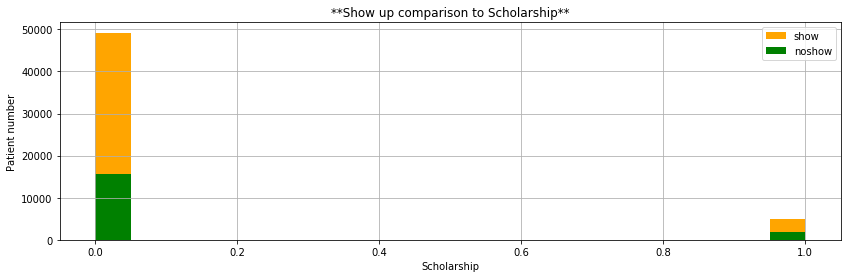

In [38]:
def Scholarship_to_showup():
    df['Scholarship'][show].hist( bins=20, color='orange', figsize=[16,6], label='show');
    df['Scholarship'][noshow].hist(bins=20, color='green', label='noshow', figsize=[14,4]);
    plt.legend();
    plt.title('**Show up comparison to Scholarship**');
    plt.xlabel('Scholarship');
    plt.ylabel('Patient number');
Scholarship_to_showup()  

**almost 90% the show patient doesn't have scholarship**

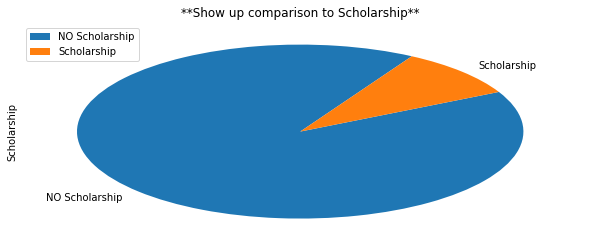

In [27]:
df['Scholarship'][show].value_counts(normalize=True).plot(kind='pie',labels=['NO Scholarship','Scholarship'], startangle = 60, figsize=[10,4]);
plt.legend();
plt.title('**Show up comparison to Scholarship**');

In [28]:
df['Scholarship'][show].value_counts(normalize=True)

0    0.908666
1    0.091334
Name: Scholarship, dtype: float64

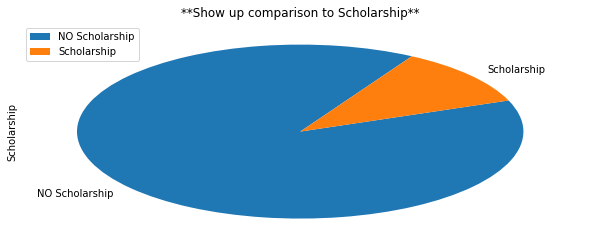

In [29]:
df['Scholarship'][noshow].value_counts(normalize=True).plot(kind='pie', labels=['NO Scholarship','Scholarship'], startangle = 60, figsize=[10,4]);
plt.legend();
plt.title('**Show up comparison to Scholarship**');

In [30]:
df['Scholarship'][noshow].value_counts(normalize=True)

0    0.891581
1    0.108419
Name: Scholarship, dtype: float64

**data shows that patient who doesn't have scholarsip showed up way more than ones who does have scholarship.**

<a id='conclusions'></a>
## Conclusions
**1- Patients ages had a major factor on show percentage were younger and middle aged oatients tended to show but the older had low show percentage.**

**2- Females show was way higher than males with percentage nearly 2:1 although gender wasn't a major affect where the numbers of both gender in both cases of show and no show nearly identical.**

**3- Most of the show patients didn't have scholarship altough they attended on time so the scholarship hadn't a major on show up.**

### Limitations
There is no clear relation between age, gender, and scholarship

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0